In [31]:
import numpy as np
from scipy.sparse import csc_matrix
from tqdm import tqdm,trange
import matplotlib.pyplot as plt
import pymatching
plt.rcParams["font.family"] = "Times New Roman"
import pandas as pd

In [ ]:
def bijection(n,S):
    """Converts a 3D array to a 1D array.
    :param n: Length of the cubic lattice along one-direction.
    :param S: Original 3D array
    :return A: Mapped 1D array
    """
    A = np.zeros(n*n*n)
    for i in range(n):
        for j in range(n):
            for k in range(n):
                A[i*n*n+j*n+k] = S[i][j][k]
    return A

In [ ]:
def creating_Xstabilizers(n):
    """Creates an array of X stabilizers. Each element is a 3D array representing an X stabilizer.
    :param n: Length of the cubic lattice along one-direction.
    :return SX: Array of X stabilizers of the code.
    """
    SX=[]
    for i in range(n-1):
        S=np.zeros((n,n,n))
        j = 0
        k = 0
        fl = 0
        direction = 1
        if i%2 == 0:
            S[i][0][0] = 1
            S[i+1][0][0] =1 
            S[i][0][1] = 1
            S[i+1][0][1] = 1
            k = 2
        else :
            S[i][0][0] = 1
            S[i+1][0][0] = 1
            k = 1
        SX.append(S)
        while True:
            S=np.zeros((n,n,n))
            S[i][j][k] = 1
            S[i+1][j][k] = 1
            jump = 0
            if k==0 and direction == -1:
                jump = 1
            if k==n-1 and direction == 1:
                jump = 1
            if jump == 1 and j==n-1:
                SX.append(S)
                fl=1
            if fl == 1:
                break
            if jump == 0:
                k = k + direction
                S[i][j][k] = 1
                S[i+1][j][k] = 1
                SX.append(S)
            if jump == 1:
                direction = -1 * direction
                j=j+1
                S[i][j][k] = 1
                S[i+1][j][k] = 1
                SX.append(S)
            jump = 0
            if k==0 and direction == -1:
                jump = 1
            if k==n-1 and direction == 1:
                jump = 1
            if jump == 1 and j==n-1:
                fl=1
            if fl == 1:
                break
            if jump == 0 :
                k = k + direction
            if jump == 1:
                direction = -1 * direction
                j=j+1
    j=1
    while(True):
        S = np.zeros((n,n,n))
        k = 0
        S[0][j][k] = 1
        S[0][j+1][k] = 1
        SX.append(S)
        k = 1
        while(True):
            S = np.zeros((n,n,n))
            S[0][j][k] = 1
            S[0][j+1][k] = 1
            S[0][j][k+1] = 1
            S[0][j+1][k+1] = 1
            k = k + 2
            SX.append(S)
            if(k == n):
                break
        j = j + 2
        if( j == n ):
            break
    j=0
    while(True):
        S = np.zeros((n,n,n))
        k = n - 1
        S[n-1][j][k] = 1
        S[n-1][j+1][k] = 1
        SX.append(S)
        k = n - 2
        while(True):
            if(k == 1):
                break
            S = np.zeros((n,n,n))
            S[n-1][j][k] = 1
            S[n-1][j+1][k] = 1
            S[n-1][j][k-1] = 1
            S[n-1][j+1][k-1] = 1
            k = k - 2
            SX.append(S)
        j = j + 2
        if( j == n - 1):
            break
    return SX

In [ ]:
def creating_Zstabilizers(n):
    """Creates an array of Z stabilizers. Each element is a 3D array representing a Z stabilizer.
    :param n: Length of the cubic lattice along one-direction.
    :return SZ: Array of Z stabilizers of the code.
    """
    SZ=[]
    for k in range(n-1):
        S=np.zeros((n,n,n))
        j = 0
        i = 0
        fl = 0
        direction = 1
        if k%2 == 1:
            S[0][0][k] = 1
            S[0][0][k+1] =1 
            S[1][0][k] = 1
            S[1][0][k+1] = 1
            i = 2
        else :
            S[0][0][k] = 1
            S[0][0][k+1] = 1
            i = 1
        SZ.append(S)
        while True:
            S=np.zeros((n,n,n))
            S[i][j][k] = 1
            S[i][j][k+1] = 1
            jump = 0
            if i==0 and direction == -1:
                jump = 1
            if i==n-1 and direction == 1:
                jump = 1
            if jump == 1 and j==n-1:
                SZ.append(S)
                fl=1
            if fl == 1:
                break
            if jump == 0:
                i = i + direction
                S[i][j][k] = 1
                S[i][j][k+1] = 1
                SZ.append(S)
            if jump == 1:
                direction = -1 * direction
                j=j+1
                S[i][j][k] = 1
                S[i][j][k+1] = 1
                SZ.append(S)
            jump = 0
            if i==0 and direction == -1:
                jump = 1
            if i==n-1 and direction == 1:
                jump = 1
            if jump == 1 and j==n-1:
                fl=1
            if fl == 1:
                break
            if jump == 0 :
                i = i + direction
            if jump == 1:
                direction = -1 * direction
                j=j+1
    j=1
    while(True):
        S = np.zeros((n,n,n))
        i = n - 1
        S[i][j][0] = 1
        S[i][j+1][0] = 1
        SZ.append(S)
        i = n - 2
        while(True):
            S = np.zeros((n,n,n))
            S[i][j][0] = 1
            S[i][j+1][0] = 1
            S[i-1][j][0] = 1
            S[i-1][j+1][0] = 1
            i = i - 2
            SZ.append(S)
            if(i == -1):
                break
        j = j + 2
        if( j == n ):
            break
    j=0
    while(True):
        S = np.zeros((n,n,n))
        i = 1
        while(True):
            S = np.zeros((n,n,n))
            S[i][j][n-1] = 1
            S[i][j+1][n-1] = 1
            S[i+1][j][n-1] = 1
            S[i+1][j+1][n-1] = 1
            i = i + 2
            SZ.append(S)
            if(i == n):
                break
        j = j + 2
        if( j == n - 1):
            break
    return SZ
    

In [ ]:
def convert_matrix_stab_to_array(n,S):
    """Converts the array of 3D stabilizers to an array of 1D stabilizers.
    :param n: Length of the cubic lattice along one-direction.
    :param S: Array of X/Z stabilizers of the code. Each X/Z stabilizer is a 3D array.
    :return S_array : Array of X/Z stabilizers of the code. Each X/Z stabilizer is a 1D array i.e., the X/Z parity check matrix.
    """
    S_array = []
    for i in range(len(S)):
        B = bijection(n,S[i])
        S_array.append(B)
    return S_array

In [ ]:
def MWPM_decoder(dist,dep_prob,samples,H_x,H_z,logical_x,logical_z):
    """Runs the MWPM decoder for a specific distance, for a specific depolarizing probability for a specific number of times to calculate logical error rate.
    :param dist: Distance of the code.
    :param samples: Number of times we need to run the simulation.
    :param H_x: X parity check matrix.
    :param H_z: Z parity check matrix.
    :logical_x: X logical operator.
    :logical_Z: Z logical operator.
    :return err: Logical error rate.
    """
    err = 0
    err_prob = dep_prob/3
    weights_z = np.ones(H_x.shape[1]) * np.log((1-err_prob)/err_prob)
    matching_z = pymatching.Matching.from_check_matrix(H_x, weights=weights_z)
    weights_x = np.ones(H_z.shape[1]) * np.log((1-err_prob)/err_prob)
    matching_x = pymatching.Matching.from_check_matrix(H_z, weights=weights_x)
    for i in trange(samples):
        noise_z = (np.random.random(H_x.shape[1]) < err_prob).astype(np.uint8)
        noise_x = (np.random.random(H_z.shape[1]) < err_prob).astype(np.uint8)
        noise_y = (np.random.random(H_z.shape[1]) < err_prob).astype(np.uint8)
        noise_z = (noise_z + noise_y)%2
        noise_x = (noise_x + noise_y)%2
        syndrome_x = H_x@noise_z % 2
        prediction_z = matching_z.decode(syndrome_x)
        noise_z = (noise_z + prediction_z)%2
        lz = noise_z@logical_x % 2
        noise_x = (np.random.random(H_z.shape[1]) < err_prob).astype(np.uint8)
        syndrome_z = H_z@noise_x % 2
        prediction_x = matching_x.decode(syndrome_z)
        noise_x = (noise_x + prediction_x)%2
        lx = noise_x@logical_z % 2
        if lz == 1 or lx == 1:
            err = err + 1
    err = err/samples
    return err    

In [37]:
dist = 5
bins = 7
samples = 10000
depolar_prob = np.linspace(0.12, 0.20, bins)
X_stab = creating_Xstabilizers(dist)
Z_stab = creating_Zstabilizers(dist)
LX = np.zeros((dist,dist,dist))
LZ = np.zeros((dist,dist,dist))
for i in range(dist):
    LX[0][0][i] = 1
    LZ[i][0][0] = 1
logical_x = bijection(dist,LX)
logical_z = bijection(dist,LZ)
X_stab_arr = convert_matrix_stab_to_array(dist,X_stab)
Z_stab_arr = convert_matrix_stab_to_array(dist,Z_stab)
H_x = csc_matrix(X_stab_arr)
H_z = csc_matrix(Z_stab_arr)
logical_error_rate_d5 = np.zeros(bins)
for i in range(bins):
    logical_error_rate_d5[i] = MWPM_decoder(dist,depolar_prob[i],samples,H_x,H_z,logical_x,logical_z)

100%|██████████| 10000/10000 [00:00<00:00, 14475.86it/s]


In [38]:
dist = 9
bins = 7
samples = 10000
depolar_prob = np.linspace(0.12, 0.20, bins)
X_stab = creating_Xstabilizers(dist)
Z_stab = creating_Zstabilizers(dist)
LX = np.zeros((dist,dist,dist))
LZ = np.zeros((dist,dist,dist))
for i in range(dist):
    LX[0][0][i] = 1
    LZ[i][0][0] = 1
logical_x = bijection(dist,LX)
logical_z = bijection(dist,LZ)
X_stab_arr = convert_matrix_stab_to_array(dist,X_stab)
Z_stab_arr = convert_matrix_stab_to_array(dist,Z_stab)
H_x = csc_matrix(X_stab_arr)
H_z = csc_matrix(Z_stab_arr)
logical_error_rate_d9 = np.zeros(bins)
for i in range(bins):
    logical_error_rate_d9[i] = MWPM_decoder(dist,depolar_prob[i],samples,H_x,H_z,logical_x,logical_z)

100%|██████████| 10000/10000 [00:02<00:00, 4371.61it/s]


In [39]:
dist = 13
bins = 7
samples = 10000
depolar_prob = np.linspace(0.12, 0.20, bins)
X_stab = creating_Xstabilizers(dist)
Z_stab = creating_Zstabilizers(dist)
LX = np.zeros((dist,dist,dist))
LZ = np.zeros((dist,dist,dist))
for i in range(dist):
    LX[0][0][i] = 1
    LZ[i][0][0] = 1
logical_x = bijection(dist,LX)
logical_z = bijection(dist,LZ)
X_stab_arr = convert_matrix_stab_to_array(dist,X_stab)
Z_stab_arr = convert_matrix_stab_to_array(dist,Z_stab)
H_x = csc_matrix(X_stab_arr)
H_z = csc_matrix(Z_stab_arr)
logical_error_rate_d13 = np.zeros(bins)
for i in range(bins):
    logical_error_rate_d13[i] = MWPM_decoder(dist,depolar_prob[i],samples,H_x,H_z,logical_x,logical_z)

100%|██████████| 10000/10000 [00:07<00:00, 1423.61it/s]


In [40]:
dist = 17
bins = 7
samples = 10000
depolar_prob = np.linspace(0.12, 0.20, bins)
X_stab = creating_Xstabilizers(dist)
Z_stab = creating_Zstabilizers(dist)
LX = np.zeros((dist,dist,dist))
LZ = np.zeros((dist,dist,dist))
for i in range(dist):
    LX[0][0][i] = 1
    LZ[i][0][0] = 1
logical_x = bijection(dist,LX)
logical_z = bijection(dist,LZ)
X_stab_arr = convert_matrix_stab_to_array(dist,X_stab)
Z_stab_arr = convert_matrix_stab_to_array(dist,Z_stab)
H_x = csc_matrix(X_stab_arr)
H_z = csc_matrix(Z_stab_arr)
logical_error_rate_d17 = np.zeros(bins)
for i in range(bins):
    logical_error_rate_d17[i] = MWPM_decoder(dist,depolar_prob[i],samples,H_x,H_z,logical_x,logical_z)

100%|██████████| 10000/10000 [00:18<00:00, 533.34it/s]


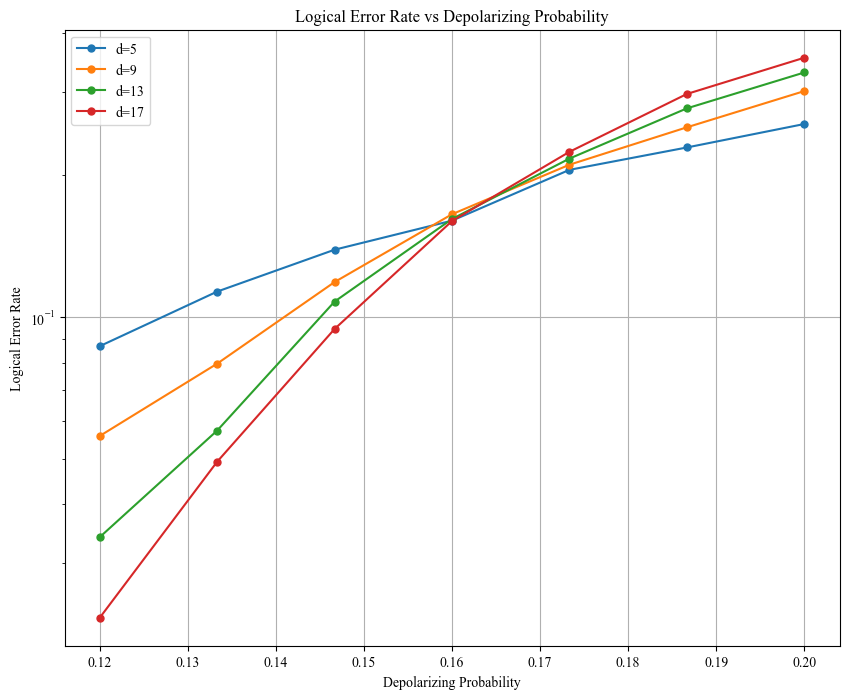

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(depolar_prob, logical_error_rate_d5, label='d=5', marker='o', markersize=5)
plt.plot(depolar_prob, logical_error_rate_d9, label='d=9', marker='o', markersize=5)
plt.plot(depolar_prob, logical_error_rate_d13, label='d=13', marker='o', markersize=5)
plt.plot(depolar_prob, logical_error_rate_d17, label='d=17', marker='o', markersize=5)
plt.xlabel('Depolarizing Probability')
plt.ylabel('Logical Error Rate')
plt.legend()
plt.title('Logical Error Rate vs Depolarizing Probability')
plt.yscale("log")
# Display the plot
plt.grid()
plt.show()

In [42]:
data = {'Depolarizing Probability':depolar_prob, 'Logical Error Rate(d=5)': logical_error_rate_d5}
df = pd.DataFrame(data)
df.to_csv('3D Compass Depolarizing d=5.csv', index = False)

In [43]:
data = {'Depolarizing Probability':depolar_prob, 'Logical Error Rate(d=9)': logical_error_rate_d9}
df = pd.DataFrame(data)
df.to_csv('3D Compass Depolarizing d=9.csv.csv', index = False)

In [44]:
data = {'Depolarizing Probability':depolar_prob, 'Logical Error Rate(d=9)': logical_error_rate_d13}
df = pd.DataFrame(data)
df.to_csv('3D Compass Depolarizing d=13.csv.csv', index = False)

In [45]:
data = {'Depolarizing Probability':depolar_prob, 'Logical Error Rate(d=9)': logical_error_rate_d17}
df = pd.DataFrame(data)
df.to_csv('3D Compass Depolarizing d=17.csv.csv', index = False)